IBM Advanced Datascience Capstone Project - Soil Moisture Prediction

Objective - Predict Soil Moisture from past observations which includes ground and air temperature, relative humidity, wind speed

In [1]:
import numpy as np
import pandas as pd
import io
import requests
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20190519201252-0001
KERNEL_ID = d4e5d8a8-ca9f-4f74-8998-31033bfb905f


Data Source -
Data was obtained from the Library of United States Department of Agriculture

•	Dataset includes hourly hydro-meteorological variables including soil moisture, air temperature and relative humidity from 11 sites in Reynolds Creek in southwestern Idaho

Two Datasets were retrieved. 
1.	Weather Dataset
2.	Soil Moisture Dataset


In [2]:
weatherurl="https://data.nal.usda.gov/system/files/weather_data_jdt2b.csv"
s=requests.get(weatherurl).content
weatherData=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
weatherData.head()

Date_time    WY  Year  Month  Day  Hour  Minute     T_a      RH   e_a  \
0  11/5/2005 0:00  2006  2005     11    5     0       0 -9999.0 -9999.0 -9999   
1  11/5/2005 1:00  2006  2005     11    5     1       0 -9999.0 -9999.0 -9999   
2  11/5/2005 2:00  2006  2005     11    5     2       0 -9999.0 -9999.0 -9999   
3  11/5/2005 3:00  2006  2005     11    5     3       0 -9999.0 -9999.0 -9999   
4  11/5/2005 4:00  2006  2005     11    5     4       0 -9999.0 -9999.0 -9999   

      T_d     w_s     w_d  
0 -9999.0 -9999.0 -9999.0  
1 -9999.0 -9999.0 -9999.0  
2 -9999.0 -9999.0 -9999.0  
3 -9999.0 -9999.0 -9999.0  
4 -9999.0 -9999.0 -9999.0

In [4]:
soilmoistureurl="https://data.nal.usda.gov/system/files/rc.tg_.dc_.jd-jdt2b_stm_0.csv"
s=requests.get(soilmoistureurl).content
soilmoistureData=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [5]:
soilmoistureData.head()

Date_time    WY  Year  Month  Day  Hour  Minute   T_g_5  T_g_20  \
0  10/1/2010 0:00  2011  2010     10    1     0       0 -9999.0 -9999.0   
1  10/1/2010 1:00  2011  2010     10    1     1       0 -9999.0 -9999.0   
2  10/1/2010 2:00  2011  2010     10    1     2       0 -9999.0 -9999.0   
3  10/1/2010 3:00  2011  2010     10    1     3       0 -9999.0 -9999.0   
4  10/1/2010 4:00  2011  2010     10    1     4       0 -9999.0 -9999.0   

   T_g_35  T_g_50  T_g_75   s_m_5  s_m_20  s_m_35  s_m_50  s_m_75  
0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
1 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
2 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
3 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0  
4 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0 -9999.0

In [6]:
#Data source documentation indicates null values are denoted by 9999
# Lets remove those
weatherClean = weatherData[(weatherData[['T_a','RH','e_a','T_d','w_s','w_d']] != -9999.000000).all(axis=1)]

In [7]:
#Data source documentation indicates null values are denoted by 9999
# # Lets remove those
soilMoistureClean = soilmoistureData[(soilmoistureData[['T_g_5','T_g_20','T_g_35','T_g_50','T_g_75','s_m_5','s_m_20','s_m_35','s_m_50','s_m_75']] != -9999.000000).all(axis=1)]

In [8]:
#Merge Data with Date being the common column
soilWeatherData = soilMoistureClean.merge(weatherClean,how="inner", on="Date_time")

In [9]:
soilWeatherData.head()

Date_time    WY  Year_x  Month_x  Day_x  Hour_x  Minute_x  T_g_5  \
0  3/4/2011 11:00  2011    2011        3      4      11         0    0.3   
1  3/4/2011 12:00  2011    2011        3      4      12         0    1.1   
2  3/4/2011 13:00  2011    2011        3      4      13         0    2.4   
3  3/4/2011 14:00  2011    2011        3      4      14         0    3.3   
4  3/4/2011 15:00  2011    2011        3      4      15         0    4.1   

   T_g_20  T_g_35  ...  Month_y  Day_y  Hour_y  Minute_y  T_a    RH  e_a  T_d  \
0     1.6     2.1  ...        3      4      11         0  2.8  0.61  456 -3.5   
1     1.6     2.1  ...        3      4      12         0  3.4  0.55  429 -4.2   
2     1.6     2.1  ...        3      4      13         0  3.9  0.52  420 -4.5   
3     1.7     2.0  ...        3      4      14         0  3.6  0.56  443 -3.8   
4     1.9     2.0  ...        3      4      15         0  4.8  0.54  465 -3.3   

   w_s    w_d  
0  3.1  169.4  
1  3.2  190.3  
2  3.1  130.2  
3  4.0  245.8  
4  2.7  135.5  

[5 rows x 29 columns]

In [10]:
#Drop columns not needed and are duplicate
soilWeatherData.dtypes

Date_time     object
WY             int64
Year_x         int64
Month_x        int64
Day_x          int64
Hour_x         int64
Minute_x       int64
T_g_5        float64
T_g_20       float64
T_g_35       float64
T_g_50       float64
T_g_75       float64
s_m_5        float64
s_m_20       float64
s_m_35       float64
s_m_50       float64
s_m_75       float64
 WY            int64
Year_y         int64
Month_y        int64
Day_y          int64
Hour_y         int64
Minute_y       int64
T_a          float64
RH           float64
e_a            int64
T_d          float64
w_s          float64
w_d          float64
dtype: object

In [11]:

# Date, Time & Hour is not required

soilWeatherConcise = soilWeatherData.filter(['T_g_5','T_g_20','T_g_35','T_g_50','T_g_75','s_m_5','s_m_20','s_m_35','s_m_50','s_m_75','T_a','RH','e_a','T_d','w_s','w_d'],axis=1)


In [12]:
soilWeatherConcise.head()

T_g_5  T_g_20  T_g_35  T_g_50  T_g_75  s_m_5  s_m_20  s_m_35  s_m_50  \
0    0.3     1.6     2.1     2.3     2.9  0.241   0.340   0.311   0.319   
1    1.1     1.6     2.1     2.3     2.9  0.243   0.340   0.312   0.322   
2    2.4     1.6     2.1     2.3     2.9  0.246   0.339   0.312   0.320   
3    3.3     1.7     2.0     2.3     2.9  0.247   0.337   0.312   0.323   
4    4.1     1.9     2.0     2.3     2.9  0.244   0.340   0.312   0.323   

   s_m_75  T_a    RH  e_a  T_d  w_s    w_d  
0   0.289  2.8  0.61  456 -3.5  3.1  169.4  
1   0.288  3.4  0.55  429 -4.2  3.2  190.3  
2   0.288  3.9  0.52  420 -4.5  3.1  130.2  
3   0.288  3.6  0.56  443 -3.8  4.0  245.8  
4   0.288  4.8  0.54  465 -3.3  2.7  135.5

In [13]:
soilWeatherConcise.shape

(27093, 16)

There are little over 27k observartions with 16 attributes

In [14]:
soilWeatherConcise.describe()

T_g_5        T_g_20        T_g_35        T_g_50        T_g_75  \
count  27093.000000  27093.000000  27093.000000  27093.000000  27093.000000   
mean      12.653412     12.525926     12.328476     12.058214     11.765740   
std       10.120863      8.716143      8.141291      7.606521      6.742225   
min       -2.000000      0.200000      0.600000      1.300000      2.200000   
25%        2.900000      3.900000      4.200000      4.300000      5.000000   
50%       11.500000     12.000000     11.900000     11.600000     11.200000   
75%       21.100000     21.100000     20.500000     19.500000     18.000000   
max       38.200000     29.200000     26.900000     25.100000     23.500000   

              s_m_5        s_m_20        s_m_35        s_m_50        s_m_75  \
count  27093.000000  27093.000000  27093.000000  27093.000000  27093.000000   
mean       0.134306      0.225555      0.210865      0.217434      0.204170   
std        0.064648      0.072174      0.069939      0.069741      0.071845   
min        0.038000      0.132000      0.120000      0.126000      0.121000   
25%        0.073000      0.163000      0.151000      0.160000      0.144000   
50%        0.121000      0.184000      0.175000      0.180000      0.162000   
75%        0.193000      0.301000      0.292000      0.292000      0.291000   
max        0.313000      0.382000      0.344000      0.352000      0.336000   

                T_a            RH           e_a           T_d           w_s  \
count  27093.000000  27093.000000  27093.000000  27093.000000  27093.000000   
mean       9.381146      0.507501    569.343078     -1.765146      2.778345   
std        9.801322      0.225752    249.478514      5.751526      1.733648   
min      -16.100000      0.060000     55.000000    -26.400000      0.400000   
25%        1.900000      0.310000    381.000000     -5.600000      1.700000   
50%        8.100000      0.490000    542.000000     -1.400000      2.300000   
75%       17.400000      0.690000    715.000000      2.200000      3.200000   
max       36.200000      1.000000   1825.000000     16.100000     14.300000   

                w_d  
count  27093.000000  
mean     210.770749  
std       91.465950  
min        0.000000  
25%      153.700000  
50%      226.200000  
75%      288.600000  
max      348.800000

In [15]:
#Data Visualization

Pairs plots help explore distributions and relationships betwen dependent and independent variables. Seaborn package is great in visualization of data. A pairs plot gives a comprehensive first look at our data set and a great starting point for the data analysis of soil mositure prediction project

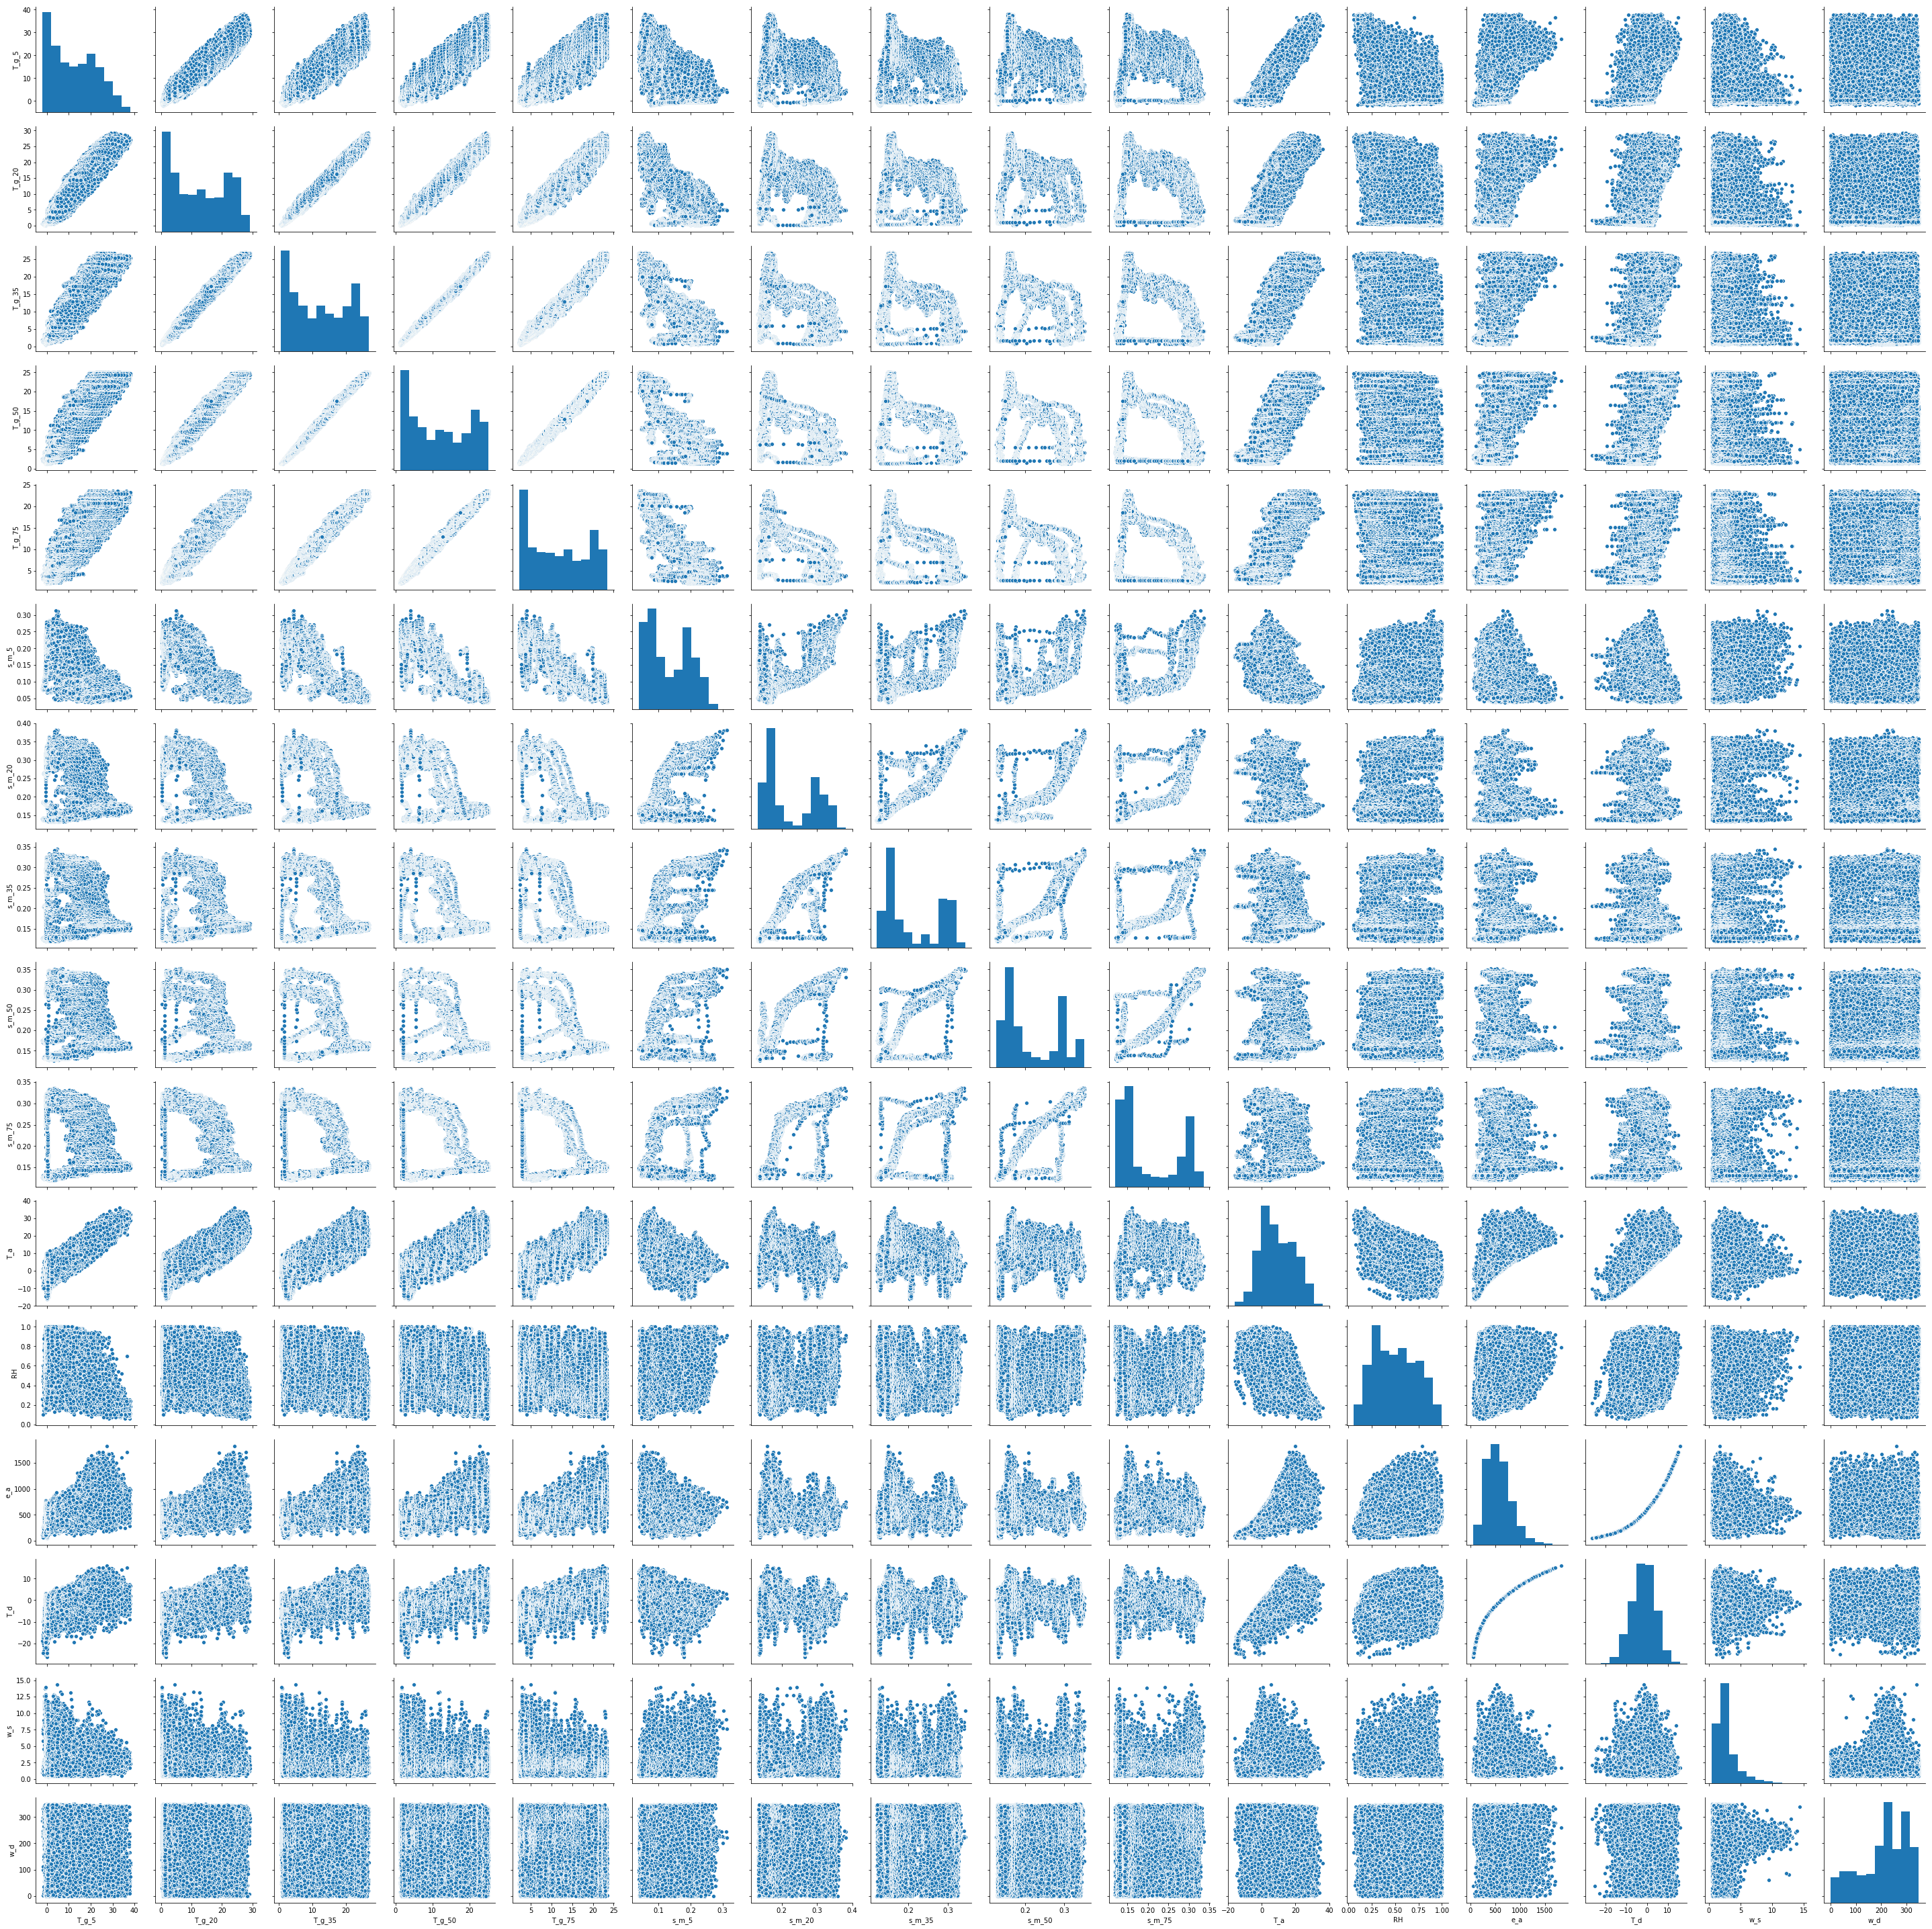

In [16]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(soilWeatherConcise)

# Let's understand the correlation between the variables 
# Here goes the Heatmap

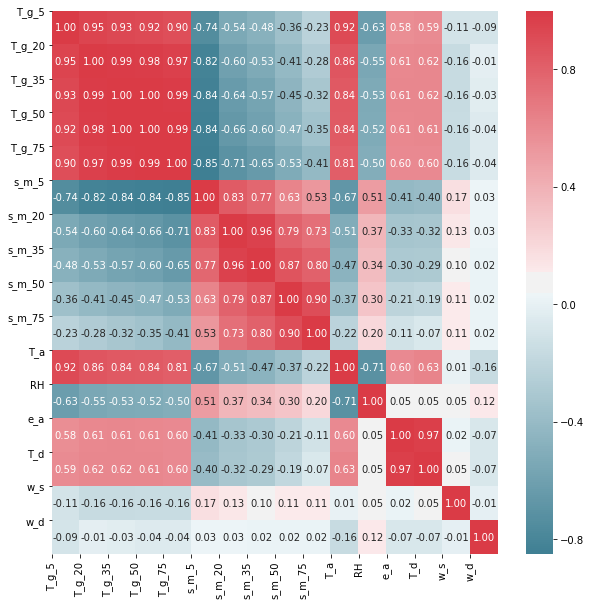

In [17]:
corr = soilWeatherConcise.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

Temperature and Soil moisture has a good correlation, especially at 35 and 20 cm depth.

In [18]:
y = soilWeatherConcise.pop('s_m_35')
X = soilWeatherConcise

In [19]:
#split the data into train and test
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
#normalize data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train= min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [22]:
def applyModel(regressor):
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
    print(regressor.score(X_test,y_test))
    return y_pred

In [23]:
def printMetrics(y_pred):
    from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
    from math import sqrt
    print("R2 score is", r2_score(y_test,y_pred))
    y_pred_pd = pd.DataFrame(y_pred,columns=['s_m_35'])
    #Calculate individual metrics
    mean_squared_error = mean_squared_error(y_test, y_pred_pd)
    mean_absolute_error = mean_absolute_error(y_test,y_pred_pd)
    print("Root Mean Squared Error = ",sqrt(mean_squared_error) )
    print("Mean Absolute Error = ",mean_absolute_error)

In [24]:
def plotResults(y_pred_pd):
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred_pd)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    ax.set_xlabel('Measured Soil Moisture(%)')
    ax.set_ylabel('Predicted Soil Moisture(%)')
    ax.set_title("Soil Moisture at 35cm from Ground level")
    plt.show()

SVM Regressor with Kernet set to linear
0.12938613334794624
R2 score is 0.12938613334794624
Root Mean Squared Error =  0.06538535455154174
Mean Absolute Error =  0.06267804132331506


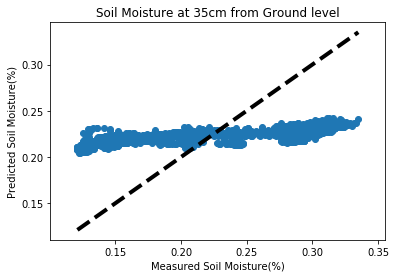

In [25]:
from sklearn.svm import SVR
print("SVM Regressor with Kernet set to linear")
# regressor with kernel set to linear
regressor=SVR(kernel='linear',degree=3)
y_pred_Lin1 = applyModel(regressor)
y_pred_pd = pd.DataFrame(y_pred_Lin1,columns=['s_m_35'])
printMetrics(y_pred_Lin1)
plotResults(y_pred_pd)

SVM Regressor with Kernet set to RBF and epsilon set to 0.1
0.0801407416104023
R2 score is 0.0801407416104023
Root Mean Squared Error =  0.06720914722503107
Mean Absolute Error =  0.06446338216617296


/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


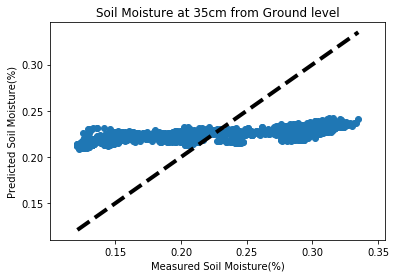

In [26]:
print("SVM Regressor with Kernet set to RBF and epsilon set to 0.1")
# regressor with kernel set to rbf
regressor=SVR(kernel='rbf',epsilon=0.1)
y_pred_RBF1 = applyModel(regressor)
y_pred_pd = pd.DataFrame(y_pred_RBF1,columns=['s_m_35'])
printMetrics(y_pred_RBF1)
plotResults(y_pred_pd)


SVM Regressor with Kernet set to poly and epsilon set to 0.1
0.07056323227305761
R2 score is 0.07056323227305761
Root Mean Squared Error =  0.06755812961867491
Mean Absolute Error =  0.06454052383468614


/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


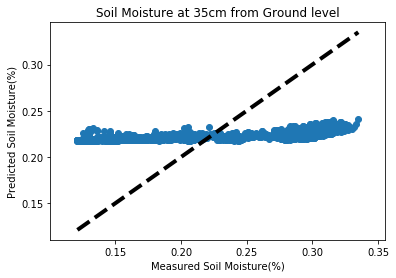

In [27]:
# regressor with kernel set to poly and epsilon = 0.1
print("SVM Regressor with Kernet set to poly and epsilon set to 0.1")
regressor=SVR(kernel='poly',epsilon=0.1)
y_pred_Poly1 = applyModel(regressor)
y_pred_pd = pd.DataFrame(y_pred_Poly1,columns=['s_m_35'])
printMetrics(y_pred_Poly1)
plotResults(y_pred_pd)

SVM Regressor with Kernet set to linear and epsilon set to 0.01
0.9511259419035354
R2 score is 0.9511259419035354
Root Mean Squared Error =  0.015491978777319913
Mean Absolute Error =  0.00892504332713058


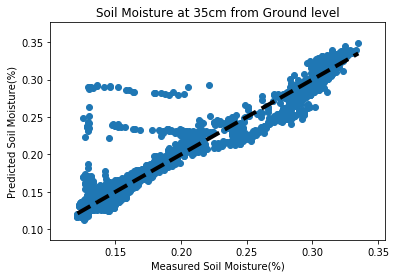

In [28]:
from sklearn.svm import SVR
print("SVM Regressor with Kernet set to linear and epsilon set to 0.01")
# regressor with kernel set to linear
regressor=SVR(kernel='linear',degree=3, epsilon=0.01)
y_pred_Lin2 = applyModel(regressor)
y_pred_pd = pd.DataFrame(y_pred_Lin2,columns=['s_m_35'])
printMetrics(y_pred_Lin2)
plotResults(y_pred_pd)

SVM Regressor with Kernet set to RBF and epsilon set to 0.01


/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9679058131755272
R2 score is 0.9679058131755272
Root Mean Squared Error =  0.01255396406533813
Mean Absolute Error =  0.0062827879994049795


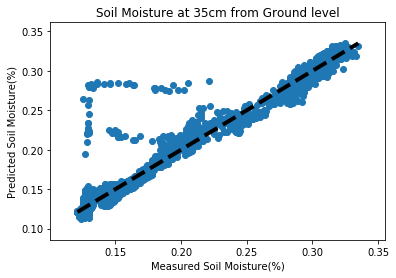

In [29]:
# regressor with kernel set to rbf and epsilon = 0.01
print("SVM Regressor with Kernet set to RBF and epsilon set to 0.01")
regressor=SVR(kernel='rbf',epsilon=0.01)
y_pred_RBF2 = applyModel(regressor)
y_pred_pd = pd.DataFrame(y_pred_RBF2,columns=['s_m_35'])
printMetrics(y_pred_RBF2)
plotResults(y_pred_pd)


SVM Regressor with Kernel set to POLY and epsilon set to 0.01


/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9399930534376719
R2 score is 0.9399930534376719
Root Mean Squared Error =  0.017165974268269192
Mean Absolute Error =  0.010515358599804944


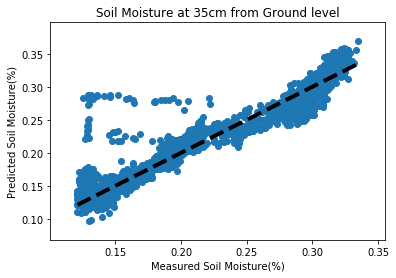

In [30]:
# regressor with kernel set to rbf and epsilon = 0.01
print("SVM Regressor with Kernel set to POLY and epsilon set to 0.01")
regressor=SVR(kernel='poly',epsilon=0.01)
y_pred_poly2 = applyModel(regressor)
y_pred_pd = pd.DataFrame(y_pred_poly2,columns=['s_m_35'])
printMetrics(y_pred_poly2)
plotResults(y_pred_pd)

In [31]:
# Lets try Neural Networks
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [32]:
# create model
model = Sequential()
model.add(Dense(64, input_dim=15, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
# Compile model
batch_size = 100
model.compile(loss='mse', optimizer='adam')
#train model
model.fit(X_train,y_train,epochs=100,batch_size=batch_size)
# make a prediction
ypredNN = model.predict(X_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


Epoch 1/100
21674/21674 [==============================] - 6s 258us/step - loss: 0.0029
Epoch 2/100
21674/21674 [==============================] - 5s 217us/step - loss: 1.7478e-04
Epoch 3/100
21674/21674 [==============================] - 6s 254us/step - loss: 1.2671e-04
Epoch 4/100
21674/21674 [==============================] - 4s 194us/step - loss: 1.0094e-04
Epoch 5/100
21674/21674 [==============================] - 7s 318us/step - loss: 8.9548e-05
Epoch 6/100
21674/21674 [==============================] - 5s 217us/step - loss: 8.4161e-05
Epoch 7/100
21674/21674 [==============================] - 6s 254us/step - loss: 8.0047e-05
Epoch 8/100
21674/21674 [==============================] - 4s 194us/step - loss: 7.8821e-05
Epoch 9/100
21674/21674 [==============================] - 6s 258us/step - loss: 7.4683e-05
Epoch 10/100
21674/21674 [==============================] - 6s 281us/step - loss: 7.1086e-05
Epoch 11/100
21674/21674 [==============================] - 6s 258us/step - loss: 6

R2 score is 0.9969032120180933
Root Mean Squared Error =  0.003899630239487445
Mean Absolute Error =  0.0024287969682418586


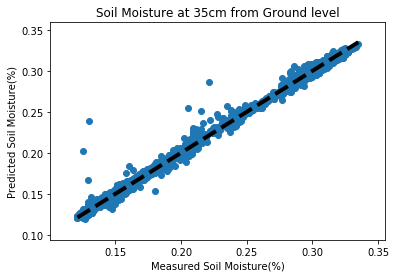

In [33]:
y_pred_pd = pd.DataFrame(ypredNN,columns=['s_m_35'])
printMetrics(ypredNN)
plotResults(y_pred_pd)

Conclusion - Neural networks perform better than Support Vector Regression. I am hopeful with further tuning of hyper parameteres in SVR, it would also perform in par with Neual Network for regression. 